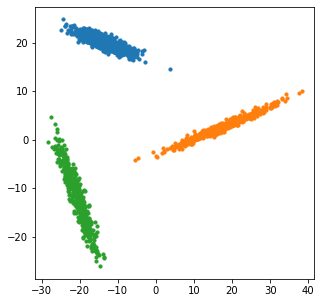

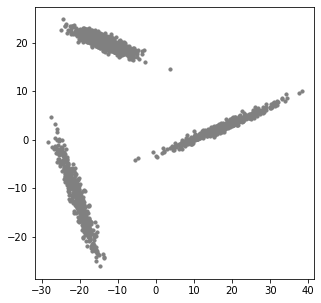

In [12]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal #가우시안 분포의 확률분포 함수 계산하기 위해 가져오는 것
#multivaritate==확률변수가 벡터일 때를 의미

# rotation
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)

# translation
t1 = 50*(np.random.rand(2,1) - 0.5)
t2 = 50*(np.random.rand(2,1) - 0.5)
t3 = 50*(np.random.rand(2,1) - 0.5)

X1 = np.random.randn(2,1000)
X1 = r1.dot(X1) + t1

X2 = np.random.randn(2,500)
X2 = r2.dot(X2) + t2

X3 = np.random.randn(2,500)
X3 = r3.dot(X3) + t3

plt.figure(figsize = (5,5))
plt.scatter(X1[0,:],X1[1,:], s = 10)
plt.scatter(X2[0,:],X2[1,:], s = 10)
plt.scatter(X3[0,:],X3[1,:], s = 10)

X = np.hstack([X1, X2, X3]) #X를 DxN으로 만들었음. 
np.random.shuffle(X)

plt.figure(figsize = (5,5))
plt.scatter(X[0,:],X[1,:],s = 10,color = "gray")



In [13]:
#변수선언
Num=np.zeros(K) 
gamma=np.zeros((K,N))

#E-step: 주어진 샘플,파라미터->responsibility를 계산
#gamma[k,n]=k번째 클러스터에서 계산한, n번째 샘플에 대한
for k in range(K):
    gamma[k,:]=pi[k]*multivariate_normal.pdf(X,T,mu[:,k],sigma[:,:,k])
gamma=gamma/np.sum(gamma,axis=0)

#M-step: 주어진 샘플,responsibility -> 파라미터를 계산
for k in range(K):
    Num[k]=np.sum(gamma[k,:])
    pi[k]=Num[k]/N
    #X=DxN행렬
    #gamma[k,:]는 1xN행렬 근데 얘를 DxN으로 만들고 싶음
    mu[:,k]=np.sum(np.matlib.repmat(gamma[k,:].reshape(1,N),D,1)*X,axis=1)
    

NameError: name 'T' is not defined

(0.0, 1.0)

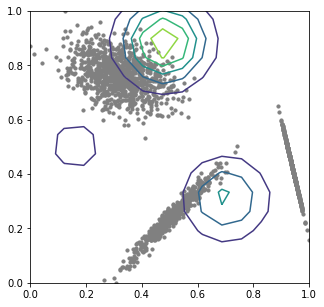

In [9]:
K = 3
maxIter = 10 # 최대 몇번 iteration을 반복할건지

# initial parameter
D,N = X.shape

# normalization -- MoG는 확률분포로 나타나므로 안해도 되긴하는데 그래도 하는게 좋대
Xmin = np.min(X, axis = 1)
Xmax = np.max(X, axis = 1)
X = (X - np.matlib.repmat(Xmin.reshape(-1,1), 1, N)) / np.matlib.repmat((Xmax - Xmin).reshape(-1,1), 1, N)
#K-means는 nomailize가 필수!

#random initialize
pi=np.random.rand(K)
pi=pi/np.sum(pi)

mu=np.random.rand(D,K) #디멘션D, 클러스터의 개수 K
sigma=np.zeros((D,D,K))
for k in range(K):
    sigma[:,:,k]=1e-2*np.identity(D) #아이덴티티 행렬로 만들었음. 1e-2곱하는건 스킬..?이라셨는데
    
#그림그리기 Draw contour
u=np.linspace(-2,5,100) #가로축을 쪼개는 벡터
v=np.linspace(-2,5,100) #세로축을 쪼개는 벡터 1000으로 쪼개는건 잘게 쪼개기 위해
uu,vv=np.meshgrid(u,v)


mog_pdf=np.zeros(uu.shape)

for k in range(0,K):
    pdf = multivariate_normal.pdf(np.hstack((uu.reshape(-1,1),vv.reshape(-1,1))), mean = mu[:,k], cov = sigma[:,:,k])
    #인수로 (확률을 계산할 위치, 평균, 공분산)
    mog_pdf += pi[k] * pdf.reshape(100,100)

plt.figure(figsize = (5,5))
plt.scatter(X[0,:],X[1,:],s = 10,color = "gray")
plt.contour(uu,vv,mog_pdf) #등고선 
plt.xlim([np.min(X[0,:]),np.max(X[0,:])])
plt.ylim([np.min(X[1,:]),np.max(X[1,:])])

(-26.140094973765123, 24.833780470861505)

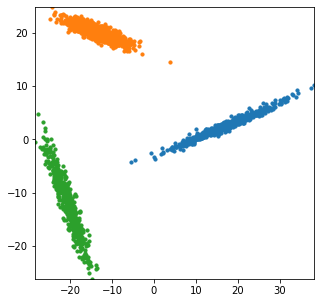

In [14]:
from sklearn.mixture import GaussianMixture
#mixture of gaussian (MoG)
#gaussian mixture model(GMM)

model = GaussianMixture(n_components = K)
labels = model.fit_predict(X.T)

plt.figure(figsize = (5,5))
for k in range(0,K):
    plt.scatter(X[0,labels == k],X[1,labels == k],s = 10)
plt.xlim([np.min(X[0,:]),np.max(X[0,:])])
plt.ylim([np.min(X[1,:]),np.max(X[1,:])])